📘 **Note Format Guide**

This format serves as a structured guide for organizing lecture content, personal interpretation, experiments, and study-related questions.

| Type | What It Means | When I Use It |
|------|----------------|----------------|
| 📝 Lecture | Original material from the professor’s notes | When I’m referencing core concepts or provided code |
| 🗣️ In-Class Note | Verbal explanations shared during the lecture | When I want to record something the professor said in class but didn’t include in the official notes |
| ✍️ My Note | My thoughts, interpretations, or additional explanations | When I reflect on or explain something in my own words |
| 🔬 Experiment | Code I tried out or changed to explore further | When I test variations or go beyond the original example |
| ❓ Question | Questions I had while studying | When I want to revisit or research something more deeply |

📝
🗣️
✍️
🔬
❓

# 1. 강의노트 원본 및 영상 링크

[https://guebin.github.io/DL2025/posts/06wk-2.html](https://guebin.github.io/DL2025/posts/06wk-2.html)

# 2. Imports 📝

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

# 3. 다항분류 📝

## A. 이항분류와 `BCEWithLogitsLoss`

`-` 데이터

In [3]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
to_tensor = torchvision.transforms.ToTensor()
X0_train = torch.stack([to_tensor(Xi) for Xi, yi in train_dataset if yi==0])
X1_train = torch.stack([to_tensor(Xi) for Xi, yi in train_dataset if yi==1])
X = torch.concat([X0_train,X1_train],axis=0).reshape(-1,784)
y = torch.tensor([0.0]*len(X0_train) + [1.0]*len(X1_train)).reshape(-1,1)

🗣️(

In [4]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,1),
    torch.nn.Sigmoid()
)

In [5]:
net(X)

tensor([[0.4577],
        [0.4624],
        [0.4653],
        ...,
        [0.4700],
        [0.4620],
        [0.4738]], grad_fn=<SigmoidBackward0>)

In [6]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,1),
)
sig = torch.nn.Sigmoid()

In [7]:
sig(net(X))

tensor([[0.4577],
        [0.4624],
        [0.4653],
        ...,
        [0.4700],
        [0.4620],
        [0.4738]], grad_fn=<SigmoidBackward0>)

In [8]:
torch.exp(net(X))/(1+torch.exp(net(X)))

tensor([[0.4577],
        [0.4624],
        [0.4653],
        ...,
        [0.4700],
        [0.4620],
        [0.4738]], grad_fn=<DivBackward0>)

In [9]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,1),
)
sig = torch.nn.Sigmoid()
loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(1,31):
    #1
    netout = net(X)
    yhat = sig(netout)
    #2
    loss = loss_fn(yhat,y)
    #3
    loss.backward()
    #4 
    optimizr.step()
    optimizr.zero_grad()

In [10]:
sig(net(X))

tensor([[0.0179],
        [0.0205],
        [0.1106],
        ...,
        [0.8751],
        [0.8740],
        [0.8033]], grad_fn=<SigmoidBackward0>)

In [32]:
torch.manual_seed(43052)
sig = torch.nn.Sigmoid()
net = torch.nn.Sequential(
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,1),
    sig
)

loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(1,31):
    #1
    #netout = net(X)
    yhat = net(X)
    #2
    loss = loss_fn(yhat,y)
    #3
    loss.backward()
    #4 
    optimizr.step()
    optimizr.zero_grad()

In [33]:
net(X)

tensor([[0.0179],
        [0.0205],
        [0.1106],
        ...,
        [0.8751],
        [0.8740],
        [0.8033]], grad_fn=<SigmoidBackward0>)

- 결과 동일
    - torch.nn.Linear(32,1)을 빼면 optimizer에 parameter가 전달이 되지 않아 update가 되지 않음
    - sig에는 학습해야할 parameter가 없으므로 빼도(빼고 나온 결과에 sig) 되고 넣어도 됨 

In [34]:
sig(net(X)) # 확률

tensor([[0.5045],
        [0.5051],
        [0.5276],
        ...,
        [0.7058],
        [0.7056],
        [0.6907]], grad_fn=<SigmoidBackward0>)

In [35]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,1),
)
sig = torch.nn.Sigmoid()
loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(1,31):
    #1
    netout = net(X)
    yhat = sig(netout)
    #2
    loss = loss_fn(yhat,y)
    #3
    loss.backward()
    #4 
    optimizr.step()
    optimizr.zero_grad()

In [36]:
logits = netout = net(X) # 로짓

In [37]:
sig(logits) # sig(net(X))과 동일

tensor([[0.0179],
        [0.0205],
        [0.1106],
        ...,
        [0.8751],
        [0.8740],
        [0.8033]], grad_fn=<SigmoidBackward0>)

In [38]:
torch.exp(logits)/(1+torch.exp(logits))

tensor([[0.0179],
        [0.0205],
        [0.1106],
        ...,
        [0.8751],
        [0.8740],
        [0.8033]], grad_fn=<DivBackward0>)

- 만약 logit이 0이면 1/2

In [41]:
torch.exp(torch.tensor([0]))/(1+torch.exp(torch.tensor([0])))

tensor([0.5000])

- 만약 logit이 양수면 증가할수록 전체 값은 1에 가까워짐
- 만약 logit이 음수면 증가할수록 전체 값은 0에 가까워짐

- 위의 내용을 활용하여 accuracy 적용 가능

In [42]:
((sig(netout) > 0.5) == y).float().mean()

tensor(0.9956)

In [43]:
sig(netout)>0.5

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [45]:
netout>0 # 위와 동일

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [47]:
((netout>0) == y).float().mean() # 위와 동일

tensor(0.9956)

)🗣️

`-` 예전에 적합했던 코드에서 sig를 분리한것 

In [48]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,1),
)
sig = torch.nn.Sigmoid()
loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(1,31):
    #1
    netout = net(X) # netout = logits
    yhat = sig(netout) # yhat = probs
    #2
    loss = loss_fn(yhat,y)
    #3
    loss.backward()
    #4 
    optimizr.step()
    optimizr.zero_grad()

`#` netout(=logits) 의 특징

- $netout >0 \Leftrightarrow sig(netout) > 0.5$
- $netout <0 \Leftrightarrow sig(netout) < 0.5$ 

In [49]:
((net(X)>0) ==y).float().mean()

tensor(0.9956)

`-` 아래의 코드는 위의 코드와 같은 코드임 

- 🗣️
    - loss에서 logits과 y를 바로 비교하고 싶음
    - BCELoss 대신 BCEWithLogitsLoss 사용 (yhat과 y가 아닌 logits과 y를 비교하여 loss계산)
    - loss에 yhat을 집어넣을 필요가 없기 때문에 yhat 구하는 코드 삭제
    - 이렇게 바꾸면 컴퓨터 공학적으로 나음 (연산 편리)

In [50]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,1),
)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(1,31):
    #1
    netout = net(X) 
    #2
    loss = loss_fn(netout,y)
    #3
    loss.backward()
    #4 
    optimizr.step()
    optimizr.zero_grad()

🗣️(

- 각 코드 마지막에 다음을 실행하고 결과를 비교하면 같음을 알 수 있음

```python
##--에폭이후코드--#
acc = ((net(X)>0) ==u).float().mean()
print(epoc, acc)
```

)🗣️

## B. 범주형자료의 변환 

`-` 범주형자료를 숫자로 어떻게 바꿀까? 

- 실패 / 성공 $\to$ 0 / 1
- 숫자0그림 / 숫자1그림 $\to$ 0 / 1 
- 강아지그림 / 고양이그림 $\to$ 0 / 1
- 강아지그림 / 고양이그림 / 토끼그림 $\to$ 0 / 1 / 2 ?????

`-` 주입식교육: 강아지그림/고양이그림/토끼그림일 경우 숫자화시키는 방법 

- 잘못된방식: 강아지그림 = 0, 고양이그림 = 1, 토끼그림 = 2
- 올바른방식: 강아지그림 = [1,0,0], 고양이그림 = [0,1,0], 토끼그림 = [0,0,1]  ### <-- 이런방식을 원핫인코딩이라함

🗣️(

```
[1,0,0]
[1,0,0]
[0,1,0]
[0,0,1]
column 별로 평균
[0.5,0.25,0.25]
강아지가 50% 있다고 생각 가능 (평균이 의미를 가짐)
```

)🗣️

`-` 왜? 

- 설명1: 강아지그림, 고양이그림,  토끼그림은 서열측도가 아니라 명목척도임. 그래서 범주를 0,1,2 로 숫자화하면 평균등의 의미가 없음 (사회조사분석사 2급 스타일) 
- 설명2: 범주형은 원핫인코딩으로 해야함 ("30일만에 끝내는 실전머신러닝" 이런 책에 나오는 스타일) 
- 설명3: 동전을 한번 던져서 나오는 결과는 $n=1$인 이항분포를 따름. 주사위 한번 던져서 나오는 눈금의 숫자는 $n=1$인 다항분포를 따름. $n=1$인 이항분포의 실현값은 0,1 이고, $n=1$인 다항분포의 실현값은 [1,0,0], [0,1,0], [0,0,1] 이므로 당연히 $y_i$ 는 [1,0,0], [0,1,0], [0,0,1] 중 하나의 형태를 가진다고 가정하는게 바람직함 (이 설명이 이 중에서 가장 정확한 설명임)

🗣️(

```
모델링 = 스트럭처 + 오차
y = 0,1,0,0,1
prob = 0.2. 0.8 (스트럭처)
오차항에 대한 모델: 이항 분포
y = 앞면, 뒷면 ---> 0,1 # n=1인 이항분포를 따름 = 베르누이를 따름
y = 주사위 1,2,3,4,5,6 ---> 다항분포를 따름 n=1
n=1인 다항분포의 realization: [1,0,0,0,0,0] ...
```

)🗣️

## C. 실습: 3개의 클래스를 구분

`-` 데이터준비 

In [52]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
to_tensor = torchvision.transforms.ToTensor()
X0 = torch.stack([to_tensor(Xi) for Xi, yi in train_dataset if yi==0])
X1 = torch.stack([to_tensor(Xi) for Xi, yi in train_dataset if yi==1])
X2 = torch.stack([to_tensor(Xi) for Xi, yi in train_dataset if yi==2])
X = torch.concat([X0,X1,X2]).reshape(-1,1*28*28)
y = torch.tensor([0]*len(X0) + [1]*len(X1)+ [2]*len(X2)).reshape(-1,1).float()

🗣️(

In [53]:
X.shape

torch.Size([18623, 784])

In [54]:
y

tensor([[0.],
        [0.],
        [0.],
        ...,
        [2.],
        [2.],
        [2.]])

In [55]:
y.reshape(-1)

tensor([0., 0., 0.,  ..., 2., 2., 2.])

In [57]:
set(y.reshape(-1).tolist())

{0.0, 1.0, 2.0}

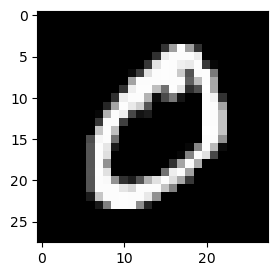

In [58]:
plt.imshow(X[0].reshape(28,28), cmap="gray")

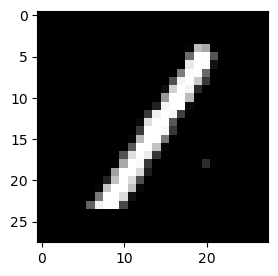

In [59]:
plt.imshow(X[10000].reshape(28,28), cmap="gray")

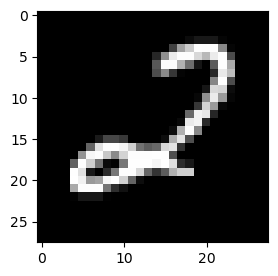

In [60]:
plt.imshow(X[-1].reshape(28,28), cmap="gray")

In [61]:
y.shape

torch.Size([18623, 1])

In [62]:
y

tensor([[0.],
        [0.],
        [0.],
        ...,
        [2.],
        [2.],
        [2.]])

- y가 이렇게 정리되어 있으면 안 됨

[[0],[0],[1],[2]] -> [[1,0,0],[1,0,0],[0,1,0],[0,0,1]] 이런식으로 바꾸고 싶음

In [63]:
# torch.nn.functional.one_hot([0,0,1,2]) # error

In [64]:
torch.nn.functional.one_hot(torch.tensor([0,0,1,2]))

tensor([[1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

- 1차원의 tensor로 넣어주면 바꿔줌

In [65]:
y.reshape(-1)

tensor([0., 0., 0.,  ..., 2., 2., 2.])

- 이대로 집어 넣으면 error (float으로 들어감)
- 1차원의 tensor + int로 넣어주면 바꿔줌

In [66]:
y.reshape(-1).long()

tensor([0, 0, 0,  ..., 2, 2, 2])

)🗣️

In [67]:
y = torch.nn.functional.one_hot(y.reshape(-1).long()).float()
y

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])

🗣️ 다시 float으로 바꿔줌

`-` 적합 

🗣️(

In [69]:
X.shape, y.shape

(torch.Size([18623, 784]), torch.Size([18623, 3]))

- Sigmoid는 1차원일 때 적용되므로 1차원이 아닌 지금은 다른 것이 필요

In [71]:
net = torch.nn.Sequential(
    torch.nn.Linear(784,32), # 일단 32 정도
    torch.nn.ReLU(), # 표현력 올리기
    torch.nn.Linear(32,3)
)
loss_fn = torch.nn.CrossEntropyLoss() # 다차원일 때 사용 (logits과 y 비교)

In [72]:
net(X)

tensor([[-0.0676,  0.0558,  0.0013],
        [-0.0191,  0.0977, -0.0303],
        [-0.0771,  0.0898,  0.0959],
        ...,
        [-0.0168,  0.0298,  0.0016],
        [ 0.0077,  0.0703,  0.0517],
        [ 0.0628,  0.0072,  0.0380]], grad_fn=<AddmmBackward0>)

In [73]:
loss_fn(net(X),y) # y가 float이 아니면 error

tensor(1.0771, grad_fn=<DivBackward1>)

- 참고) BCEWithLigitsLoss: Binary Cross Entropy

)🗣️

In [74]:
net = torch.nn.Sequential(
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,3),
)
loss_fn = torch.nn.CrossEntropyLoss() # 의미상 CEWithLogitsLoss
optimizr = torch.optim.Adam(net.parameters())
for epoc in range(1,31):
    #1
    netout = net(X) # netout: (n,3) 
    #2
    loss = loss_fn(netout,y) 
    #3
    loss.backward()
    #4 
    optimizr.step()
    optimizr.zero_grad()

🗣️(

- accuracy 계산

In [78]:
netout[::2] # logit 값 (클수록 1이 나올 확률이 높음)

tensor([[ 2.7971, -1.7052, -1.4072],
        [ 1.3707, -0.7746, -0.2272],
        [ 4.1326, -2.8297, -1.6813],
        ...,
        [-0.5738, -2.3579,  1.8868],
        [ 0.3950, -1.6556,  1.0137],
        [-0.7091, -1.2342,  1.3557]], grad_fn=<SliceBackward0>)

In [79]:
torch.exp(netout) # 전부 양수가 됨

tensor([[16.3971,  0.1817,  0.2448],
        [19.7109,  0.2345,  0.2365],
        [ 3.9381,  0.4609,  0.7968],
        ...,
        [ 1.4843,  0.1910,  2.7557],
        [ 0.5556,  0.1023,  9.1077],
        [ 0.4921,  0.2911,  3.8796]], grad_fn=<ExpBackward0>)

In [82]:
p1 = 16.3971 / (16.3971+0.1817+0.2448)
p2 = 0.1817 / (16.3971+0.1817+0.2448)
p3 = 0.2448 / (16.3971+0.1817+0.2448)

In [83]:
p1,p2,p3 # 0~1사이에 있음 # 무조건 양수 # p1+p2+p3 = 1
# --> 각각 카테고리에 속할 확률이라고 해석 가능 (softmax function)
# 숫자가 크면 그 카테고리에 속한다고 네트워크가 강하게 확신

(0.9746487077676597, 0.010800304334387409, 0.014550987897952877)

In [84]:
netout

tensor([[ 2.7971, -1.7052, -1.4072],
        [ 2.9812, -1.4505, -1.4417],
        [ 1.3707, -0.7746, -0.2272],
        ...,
        [ 0.3950, -1.6556,  1.0137],
        [-0.5878, -2.2794,  2.2091],
        [-0.7091, -1.2342,  1.3557]], grad_fn=<AddmmBackward0>)

In [85]:
netout.argmax(axis=1) # 예측값

tensor([0, 0, 0,  ..., 2, 2, 2])

In [86]:
y

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])

In [87]:
y.argmax(axis=1)

tensor([0, 0, 0,  ..., 2, 2, 2])

)🗣️

In [88]:
(netout.argmax(axis=1) == y.argmax(axis=1)).float().mean()

tensor(0.9674)

## D. 결론 -- 외우세여

`-` 파이토치버전 // 코딩용

|분류 | netout의 의미 | 손실함수 | 
|:--:|:--:|:--:|
|이항분류 | prob | `BCELoss` | 
|이항분류 | logit | `BCEWithLogitsLoss` | 
|다항분류| probs |  NA |
|다항분류| logits |  `CrossEntropyLoss` | 

- 🗣️
    - prob인데 BCEWithLogitsLoss: Sigmoid 2번
    - logit인데 BCELoss: Sigmoid 0번
    - 2번째와 4번째가 코딩적으로 나음, 개념적으로 이해하기는 1번째가 나음  

> `CrossEntropyLoss` 이거 이름이 완전 마음에 안들어요.. `CEWithLogitsLoss` 라고 하는게 더 좋을 것 같습니다. 

`-` 일반적개념 // 이론용

|분류 |오차항의가정|  마지막활성화함수 | 손실함수 | 
|:--:|:--:|:--:|:--:|
|이항분류 | 이항분포 | sigmoid^[prob=sig(logit)] |Binary Cross Entropy  | 
|다항분류| 다항분포 | softmax^[probs=soft(logits)] |  Cross Entropy |

`-` 참고 (sigmoid, softmax 계산과정비교) 

- $prob = \text{sig}(logit) =\frac{\exp(logit)}{1+\exp(logit)}$
- $probs= \text{softmax}\left(\begin{bmatrix} logit_1 \\ logit_2 \\ logit_3\end{bmatrix}\right) =\begin{bmatrix} \frac{\exp(logit_1)}{\exp(logit_1)+\exp(logit_2)+\exp(logit_3)} \\ 
\frac{\exp(logit_2)}{\exp(logit_1)+\exp(logit_2)+\exp(logit_3)} \\
\frac{\exp(logit_3)}{\exp(logit_1)+\exp(logit_2)+\exp(logit_3)} \end{bmatrix}$

# 4. FashionMNIST 📝

## A. 데이터 

<https://arxiv.org/abs/1708.07747> [@xiao2017fashion]

In [89]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True)
to_tensor = torchvision.transforms.ToTensor()
X = torch.stack([to_tensor(img) for img, lbl in train_dataset])
y = torch.tensor([lbl for img, lbl in train_dataset])
y = torch.nn.functional.one_hot(y).float()
XX = torch.stack([to_tensor(img) for img, lbl in test_dataset])
yy = torch.tensor([lbl for img, lbl in test_dataset])
yy = torch.nn.functional.one_hot(yy).float()

100.0%
100.0%
100.0%
100.0%


🗣️(

In [90]:
X.shape, y.shape, XX.shape, yy.shape

(torch.Size([60000, 1, 28, 28]),
 torch.Size([60000, 10]),
 torch.Size([10000, 1, 28, 28]),
 torch.Size([10000, 10]))

In [95]:
X[0,0,:,:].shape # 4차원

torch.Size([28, 28])

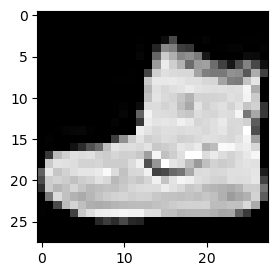

In [96]:
plt.imshow(X[0,0,:,:], cmap="gray")

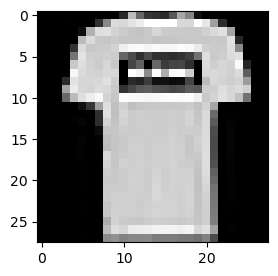

In [98]:
plt.imshow(X[1,0,:,:], cmap="gray") # 다음 그림

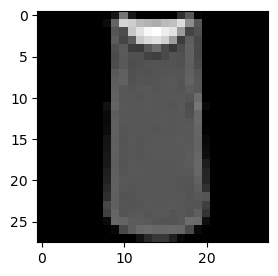

In [99]:
plt.imshow(X[2,0,:,:], cmap="gray") # 다음 그림

In [100]:
y # 원핫인코딩 되어 있음

tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [101]:
torchvision.datasets.FashionMNIST.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [103]:
torchvision.datasets.FashionMNIST.classes[9] # label 9가 의미하는 것

'Ankle boot'

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


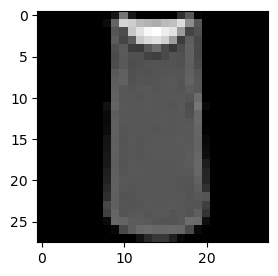

In [105]:
plt.imshow(X[2,0,:,:], cmap="gray")
print(y[2,:])

tensor(0)


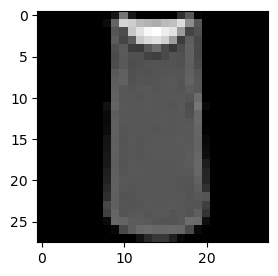

In [106]:
plt.imshow(X[2,0,:,:], cmap="gray")
print(y[2,:].argmax())

0


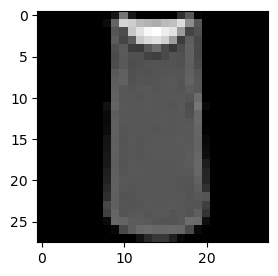

In [107]:
plt.imshow(X[2,0,:,:], cmap="gray")
print(y[2,:].argmax().item())

T-shirt/top


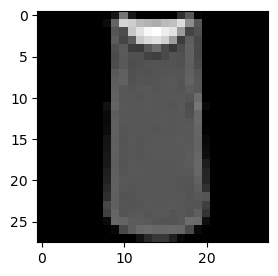

In [108]:
plt.imshow(X[2,0,:,:], cmap="gray")
print(torchvision.datasets.FashionMNIST.classes[y[2,:].argmax().item()])

)🗣️

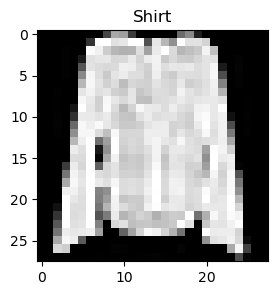

In [109]:
obs_idx = 301
plt.imshow(X[obs_idx,0,:,:],cmap="gray")
plt.title(torchvision.datasets.FashionMNIST.classes[y[obs_idx,:].argmax().item()]);

## B. 간단한 신경망

🗣️(

In [110]:
net = torch.nn.Sequential(
    torch.nn.Linear(784,32), # 28*28
    torch.nn.ReLU(),
    torch.nn.Linear(32,10)
)
loss.fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
#---#

In [112]:
# net(X) # error

In [114]:
X.shape # 784가 아님

torch.Size([60000, 1, 28, 28])

In [116]:
net(X.reshape(-1,784))

tensor([[-0.1190,  0.1954, -0.1191,  ...,  0.0729,  0.1721, -0.0408],
        [-0.0379,  0.2657, -0.0238,  ..., -0.0695,  0.1528, -0.0089],
        [-0.0768,  0.1645,  0.0813,  ...,  0.0280,  0.0686, -0.0330],
        ...,
        [-0.1537,  0.0787, -0.0260,  ..., -0.0972,  0.0474,  0.0150],
        [-0.0558,  0.1724,  0.0855,  ...,  0.0176,  0.0808, -0.0563],
        [-0.0231,  0.2125,  0.0721,  ...,  0.0299,  0.2542, -0.0449]],
       grad_fn=<AddmmBackward0>)

- 매번 하기는 귀찮음 (다음과 같이 하고 싶음)

```python
net = torch.nn.Sequential(
    형태를 바꿔주는 변환,
    torch.nn.Linear(784,32), # 28*28
    torch.nn.ReLU(),
    torch.nn.Linear(32,10)
)
loss.fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
```

In [121]:
class Flatten(torch.nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,inp):
        out=inp.reshape(-1,784)
        return out

In [122]:
net = torch.nn.Sequential(
    Flatten(),
    torch.nn.Linear(784,32), # 28*28
    torch.nn.ReLU(),
    torch.nn.Linear(32,10)
)
loss.fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
#---#

In [123]:
net(X)

tensor([[ 0.1065, -0.0595, -0.0168,  ...,  0.0957,  0.0512,  0.1637],
        [-0.0600, -0.4660,  0.2520,  ...,  0.4221,  0.0290,  0.1224],
        [ 0.0321, -0.2154,  0.0601,  ...,  0.2178, -0.0819,  0.0307],
        ...,
        [ 0.0069, -0.3970,  0.0333,  ...,  0.2753,  0.0132,  0.1855],
        [ 0.0425, -0.2264,  0.0967,  ...,  0.2295, -0.0723,  0.0762],
        [ 0.0436, -0.2097,  0.0193,  ...,  0.2153, -0.0889, -0.0272]],
       grad_fn=<AddmmBackward0>)

```python
class Flatten(torch.nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,inp):
        # out=inp.reshape(-1,784) # 여기 빼고 고정
        return out
```

- 사용자가 원하는 대로 할 수는 있지만 귀찮음 (torch에 같은 기능을 지원해줌)

In [125]:
net = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784,32), # 28*28
    torch.nn.ReLU(),
    torch.nn.Linear(32,10)
)
loss.fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
#---#

In [126]:
net(X)

tensor([[-0.1967,  0.0710, -0.1439,  ..., -0.0351, -0.2101, -0.0983],
        [-0.0537,  0.0729, -0.1805,  ...,  0.0139, -0.1520, -0.0359],
        [-0.1419,  0.1204, -0.0488,  ..., -0.0232, -0.0582, -0.0687],
        ...,
        [-0.1134,  0.1152, -0.0716,  ...,  0.0311, -0.1294, -0.1053],
        [-0.1655,  0.1211, -0.0752,  ..., -0.0604, -0.0637, -0.0946],
        [-0.2413,  0.1072,  0.0042,  ..., -0.0254, -0.1170, -0.1348]],
       grad_fn=<AddmmBackward0>)

- 진행

In [134]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,10)
)
loss.fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
#--#

In [135]:
for epoc in range(1,301):
    #---에폭시작---#
    # 1
    netout = net(X)
    # 2
    loss = loss_fn(netout,y)
    # 3
    loss.backward()
    # 4
    optimizr.step()
    optimizr.zero_grad()
    #---에폭끝---#
    if epoc%50==0:
        logits = net(X).data
        acc = (logits.argmax(axis=1) == y.argmax(axis=1)).float().mean()       
        print(f"# of epochs={epoc}, train_acc={acc:.4f}")  

# of epochs=50, train_acc=0.7334
# of epochs=100, train_acc=0.8052
# of epochs=150, train_acc=0.8295
# of epochs=200, train_acc=0.8398
# of epochs=250, train_acc=0.8488
# of epochs=300, train_acc=0.8556


In [136]:
logits = net(XX).data
acc = (logits.argmax(axis=1) == yy.argmax(axis=1)).float().mean()       
print(f"test_acc={acc:.4f}")

test_acc=0.8383


- 오버피팅도 있는 것 같고 훈련을 더 한다고해서 훈련 정확도가 높아질 것 같지도 않음 (표현력 자체가 안좋은 것 같음)
- 이제 32도 늘려보고 여러가지 시도를 하고 싶은데 GPU를 사용해야할 것 같음
- X가 cuda에 전부 안 올라갈 수 있으므로 다음과 같은 준비과정 필요

)🗣️

`-` Step1: 데이터정리 

In [137]:
ds_train = torch.utils.data.TensorDataset(X,y)
dl_train = torch.utils.data.DataLoader(ds_train,batch_size=256,shuffle=True)
ds_test = torch.utils.data.TensorDataset(XX,yy)
dl_test = torch.utils.data.DataLoader(ds_test,batch_size=256)

- 🗣️
    - test data도 GPU 메모리가 걱정되면 따로 정리
    - batch_size는 GPU 메모리가 감당할 수 있는 정도 (일단 train과 같은 크기로 함)
    - test는 update 하지도 않고 accuracy만 계산하면 되므로 굳이 shuffle 필요 X

`-` Step2: 학습에 필요한 준비 (모델링) 

In [138]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,10)
).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
#---#

`-` Step3: 적합

In [139]:
for epoc in range(1,31):
    net.train() # 지금은 아니지만 dropout 사용 시
    #---에폭시작---#
    for Xm,ym in dl_train:        
        Xm = Xm.to("cuda:0")
        ym = ym.to("cuda:0")
        # 1
        netout = net(Xm)
        # 2 
        loss = loss_fn(netout,ym)
        # 3 
        loss.backward()
        # 4 
        optimizr.step()
        optimizr.zero_grad()
    #---에폭끝---#
    if epoc % 5 == 0:
        net.eval()
        s =0
        for Xm,ym in dl_train:        
            Xm = Xm.to("cuda:0")
            ym = ym.to("cuda:0")        
            logits = net(Xm).data 
            s = s+ (logits.argmax(axis=1) == ym.argmax(axis=1)).float().sum()
        acc = s / len(X)
        print(f"# of epochs = {epoc},train_acc = {acc:.4f}") 

# of epochs = 5,train_acc = 0.8588
# of epochs = 10,train_acc = 0.8659
# of epochs = 15,train_acc = 0.8779
# of epochs = 20,train_acc = 0.8831
# of epochs = 25,train_acc = 0.8856
# of epochs = 30,train_acc = 0.8876


`-` Step4: 적합결과 시각화 및 분석 

In [140]:
net.eval()
s =0
for Xm,ym in dl_test:        
    Xm = Xm.to("cuda:0")
    ym = ym.to("cuda:0")        
    logits = net(Xm).data 
    s = s+ (logits.argmax(axis=1) == ym.argmax(axis=1)).float().sum()
acc = s / len(XX)
print(f"test_acc = {acc:.4f}") 

test_acc = 0.8638


🗣️ 개선이 필요해보임

## C. 약간 더 복잡한 신경망

In [141]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784,256),
    torch.nn.ReLU(),
    torch.nn.Linear(256,10)
).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
#---#

In [142]:
for epoc in range(1,31):
    net.train()
    #---에폭시작---#
    for Xm,ym in dl_train:        
        Xm = Xm.to("cuda:0")
        ym = ym.to("cuda:0")
        # 1
        netout = net(Xm)
        # 2 
        loss = loss_fn(netout,ym)
        # 3 
        loss.backward()
        # 4 
        optimizr.step()
        optimizr.zero_grad()
    #---에폭끝---#
    if epoc % 5 == 0:
        net.eval()
        s =0
        for Xm,ym in dl_train:        
            Xm = Xm.to("cuda:0")
            ym = ym.to("cuda:0")        
            logits = net(Xm).data 
            s = s+ (logits.argmax(axis=1) == ym.argmax(axis=1)).float().sum()
        acc = s / len(X)
        print(f"# of epochs = {epoc},train_acc = {acc:.4f}") 

# of epochs = 5,train_acc = 0.8843
# of epochs = 10,train_acc = 0.9020
# of epochs = 15,train_acc = 0.9176
# of epochs = 20,train_acc = 0.9265
# of epochs = 25,train_acc = 0.9345
# of epochs = 30,train_acc = 0.9388


In [143]:
net.eval()
s =0
for Xm,ym in dl_test:        
    Xm = Xm.to("cuda:0")
    ym = ym.to("cuda:0")        
    logits = net(Xm).data 
    s = s+ (logits.argmax(axis=1) == ym.argmax(axis=1)).float().sum()
acc = s / len(XX)
print(f"test_acc = {acc:.4f}") 

test_acc = 0.8892


🗣️ 오버피팅인 것 같고 만족스럽지도 않음

## D. 발악

`-` 노드를 많이.. 

In [144]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784,4096),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(4096,10)
).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
#---#

In [145]:
for epoc in range(1,31):
    net.train()
    #---에폭시작---#
    for Xm,ym in dl_train:        
        Xm = Xm.to("cuda:0")
        ym = ym.to("cuda:0")
        # 1
        netout = net(Xm)
        # 2 
        loss = loss_fn(netout,ym)
        # 3 
        loss.backward()
        # 4 
        optimizr.step()
        optimizr.zero_grad()
    #---에폭끝---#
    if epoc % 5 == 0:
        net.eval()
        s =0
        for Xm,ym in dl_train:        
            Xm = Xm.to("cuda:0")
            ym = ym.to("cuda:0")        
            logits = net(Xm).data 
            s = s+ (logits.argmax(axis=1) == ym.argmax(axis=1)).float().sum()
        acc = s / len(X)
        print(f"# of epochs = {epoc},train_acc = {acc:.4f}") 

# of epochs = 5,train_acc = 0.8870
# of epochs = 10,train_acc = 0.9024
# of epochs = 15,train_acc = 0.9116
# of epochs = 20,train_acc = 0.9214
# of epochs = 25,train_acc = 0.9302
# of epochs = 30,train_acc = 0.9307


In [146]:
net.eval()
s =0
for Xm,ym in dl_test:        
    Xm = Xm.to("cuda:0")
    ym = ym.to("cuda:0")        
    logits = net(Xm).data 
    s = s+ (logits.argmax(axis=1) == ym.argmax(axis=1)).float().sum()
acc = s / len(XX)
print(f"test_acc = {acc:.4f}") 

test_acc = 0.8913


🗣️ 크게 의미 없어 보임

`-`  레이어를 많이.. 

🗣️ 256이 괜찮은 것 같아서 많이 반복해봄

In [147]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784,256),
    torch.nn.ReLU(),
    torch.nn.Linear(256,256),
    torch.nn.ReLU(),
    torch.nn.Linear(256,256),
    torch.nn.ReLU(), 
    torch.nn.Linear(256,256),
    torch.nn.ReLU(),    
    torch.nn.Linear(256,10)
).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
#---#

In [148]:
for epoc in range(1,31):
    net.train()
    #---에폭시작---#
    for Xm,ym in dl_train:        
        Xm = Xm.to("cuda:0")
        ym = ym.to("cuda:0")
        # 1
        netout = net(Xm)
        # 2 
        loss = loss_fn(netout,ym)
        # 3 
        loss.backward()
        # 4 
        optimizr.step()
        optimizr.zero_grad()
    #---에폭끝---#
    if epoc % 5 == 0:
        net.eval()
        s =0
        for Xm,ym in dl_train:        
            Xm = Xm.to("cuda:0")
            ym = ym.to("cuda:0")        
            logits = net(Xm).data 
            s = s+ (logits.argmax(axis=1) == ym.argmax(axis=1)).float().sum()
        acc = s / len(X)
        print(f"# of epochs = {epoc},train_acc = {acc:.4f}") 

# of epochs = 5,train_acc = 0.8881
# of epochs = 10,train_acc = 0.9154
# of epochs = 15,train_acc = 0.9240
# of epochs = 20,train_acc = 0.9303
# of epochs = 25,train_acc = 0.9511
# of epochs = 30,train_acc = 0.9547


In [149]:
net.eval()
s =0
for Xm,ym in dl_test:        
    Xm = Xm.to("cuda:0")
    ym = ym.to("cuda:0")        
    logits = net(Xm).data 
    s = s+ (logits.argmax(axis=1) == ym.argmax(axis=1)).float().sum()
acc = s / len(XX)
print(f"test_acc = {acc:.4f}") 

test_acc = 0.8907


> test_acc 90\% 넘기는게 엄청 힘들다 

## F. 합성곱신경망

`-` <https://brunch.co.kr/@hvnpoet/109> 

🗣️(

- 선형변환 + 비선형변환
- Linear transform 대신 Convolution2d (그냥 2d 버전의 선형변환이라고 일단 생각)
- input channel: 흑백 1개, 컬러 3개
- output channel: input을 몇개로 변환할지
- 비선형변환은 ReLU로 진행
- kernel_size: 다음에 설명 (윈도우 크기)

In [150]:
net = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=5),
    torch.nn.ReLU(),
)

In [151]:
X.shape

torch.Size([60000, 1, 28, 28])

In [152]:
net(X).shape

torch.Size([60000, 64, 24, 24])

- 숫자가 이런 식으로 변함

In [153]:
net = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2)
)

In [154]:
X.shape

torch.Size([60000, 1, 28, 28])

In [155]:
net(X).shape

torch.Size([60000, 64, 12, 12])

- 이 상태에서 Flatten()

In [156]:
net = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Flatten()
)

In [157]:
X.shape

torch.Size([60000, 1, 28, 28])

In [158]:
net(X).shape

torch.Size([60000, 9216])

```python
net = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Flatten(),
    torch.nn.Linear(9216,10) # 이 이후는 softmax function
)
```

```python
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1 ,out_channels=64,kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),    
    torch.nn.Flatten(),
    torch.nn.Linear(9216,10)
).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
```

- 층을 한 번 더 반복

In [159]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1 ,out_channels=64,kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Conv2d(in_channels=64 ,out_channels=64,kernel_size=5), # 64
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),    
    torch.nn.Flatten(),
    torch.nn.Linear(9216,10)
).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
#---#

In [161]:
# net(X.to("cuda:0")) # error

- RuntimeError: mat1 and mat2 shapes cannot be multiplied (60000x1024 and 9216x10)

)🗣️

In [164]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1 ,out_channels=64,kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Conv2d(in_channels=64 ,out_channels=64,kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),    
    torch.nn.Flatten(),
    torch.nn.Linear(1024,10)
).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
#---#

- 🗣️
    - 예전에는 Flatten을 하고 시작
    - 이번에는 Flatten 전에 이미지 자체를 처리하는 과정을 거쳤더니
    - (Flatten 다음은 차원만 맞춤 - 선형변환)
    - 결과가 잘 나옴

In [165]:
for epoc in range(1,31):
    net.train()
    #---에폭시작---#
    for Xm,ym in dl_train:        
        Xm = Xm.to("cuda:0")
        ym = ym.to("cuda:0")
        # 1
        netout = net(Xm)
        # 2 
        loss = loss_fn(netout,ym)
        # 3 
        loss.backward()
        # 4 
        optimizr.step()
        optimizr.zero_grad()
    #---에폭끝---#
    if epoc % 5 == 0:
        net.eval()
        s =0
        for Xm,ym in dl_train:        
            Xm = Xm.to("cuda:0")
            ym = ym.to("cuda:0")        
            logits = net(Xm).data 
            s = s+ (logits.argmax(axis=1) == ym.argmax(axis=1)).float().sum()
        acc = s / len(X)
        print(f"# of epochs = {epoc},train_acc = {acc:.4f}") 

# of epochs = 5,train_acc = 0.9065
# of epochs = 10,train_acc = 0.9326
# of epochs = 15,train_acc = 0.9438
# of epochs = 20,train_acc = 0.9552
# of epochs = 25,train_acc = 0.9689
# of epochs = 30,train_acc = 0.9756


- 🗣️ 표현력 자체는 좋음

- 🗣️ 오버피팅 감안하더라도 정확도가 올라감 (90% 넘음)

In [166]:
net.eval()
s =0
for Xm,ym in dl_test:        
    Xm = Xm.to("cuda:0")
    ym = ym.to("cuda:0")        
    logits = net(Xm).data 
    s = s+ (logits.argmax(axis=1) == ym.argmax(axis=1)).float().sum()
acc = s / len(XX)
print(f"test_acc = {acc:.4f}") 

test_acc = 0.9151


:::{.callout-note}
네트워크를 아래와 같이 설정했더니
```Python
net = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1 ,out_channels=64,kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Conv2d(in_channels=64 ,out_channels=64,kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),    
    torch.nn.Flatten(),
    torch.nn.Linear(1024,10)
)
```
결과가 좋네? 정도만 알면됩니다. 
:::